## PHYS247-Winter 2021: Homework 1 Solution

###TA: Amartya Mitra

#### How to insert an image in Colab

```
from google.colab import files
from IPython import display

uploaded = files.upload()

display.Image("myimage.jpg",
              width=1000)
```



In [ ]:
#Importing relevant libraries
import numpy as np
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['font.family'] = 'serif'
import time
from numpy import linalg as LA
import copy

### Part C)

In [ ]:
Possible_move = {
  0: [0,0,0,0,0,0,0,0,1,0],
  1: [0,0,1,0,1,0,0,0,0,0],
  2: [0,1,0,1,0,1,0,0,0,0],
  3: [0,0,1,0,0,0,1,0,0,0],
  4: [0,1,0,0,0,1,0,1,0,0],
  5: [0,0,1,0,1,0,1,0,1,0],
  6: [0,0,0,1,0,1,0,0,0,1],
  7: [0,0,0,0,1,0,0,0,1,0],
  8: [1,0,0,0,0,1,0,1,0,1],
  9: [0,0,0,0,0,0,1,0,1,0],
}

In [ ]:
A=list(Possible_move.values())
A

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]]

In [ ]:
v=[[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]

In [ ]:
A_mat=np.matrix(A)
v_mat=np.matrix(v)

In [ ]:
np.any(A_mat==A_mat.T)
#np.array_equal(A_mat, A_mat.T)

True

### Part d)

In [ ]:
def DialerProblem(S,N,A_=A_mat[:],v_=v_mat[:]):
    if N<2:
        return ('N should be >1')
    else:
        A=A_*v_
        t1=time.time()
        for i in range(N-2):
            A=A_*A
        t2=time.time()
    return (int(A[S]),(t2-t1)*1000)

In [ ]:
print("DialerProblem(5,10)=",DialerProblem(5,10)[0], "and takes" ,DialerProblem(5,10)[1], "ms")

DialerProblem(5,10)= 18713 and takes 0.09608268737792969 ms


### Part e)

In [ ]:
def MatrixMulti(A,B):
    """
    A function which computes matrix multiplication of the first 
    and second inputs. Inputs should be list-like.
    """
    
    if len(A[0])==len(B):
        R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]
        return R
    else: 
        print('Matrix dimensions do not match')

In [ ]:
def DialerProblem_no_numpy(S,N,A_=A[:],v_=v[:]):
    if N<2:
        return ('N should be >1')
    else:
        A=MatrixMulti(A_,v_)
        t1=time.time()
        for i in range(N-2):
            A=MatrixMulti(A_,A)
        t2=time.time()
    return (A[S][0],(t2-t1)*1000)

In [ ]:
print("DialerProblem_no_numpy(5,10)=",DialerProblem_no_numpy(5,10)[0], "and takes" ,DialerProblem_no_numpy(5,10)[1], "ms")

DialerProblem_no_numpy(5,10)= 18713 and takes 0.19788742065429688 ms


### Part f)

In [ ]:
N=np.arange(2,1001)
T=[]
for i in N:
    T.append(DialerProblem(5, i)[1])

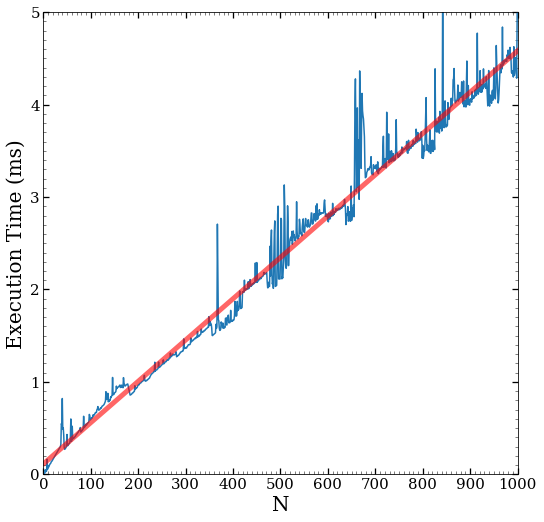

In [ ]:
  
fig, ax = plt.subplots(1, 1,  figsize=(8.5,8.5))

xmajor = np.arange(0,1100,100)
xminor = np.arange(0,1100,10)

ymajor = np.arange(-1,10,1)
yminor = np.arange(-1,10,0.1)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)

ax.set_yticks(ymajor)
ax.set_yticks(yminor,minor=True)


plt.plot(N,T)
f_t=np.poly1d(np.polyfit(N,T,1))
plt.plot(N,f_t(N),linewidth=5,c='red',alpha=0.6)

ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)
ax.set_xlim(0,1000)
ax.set_ylim(0,5)


ax.set_ylabel('Execution Time (ms)',fontsize=20)
ax.set_xlabel('N',fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

### Part g)

In [ ]:
print("N=10000000 will take",f_t(10e7)/1000/60," minutes")

N=10000000 will take 7.451219163688284  minutes


### Part h)

In [ ]:
def dec2bin(x):
        b=[]
        while (x>0):
            b.insert(0,x % 2)
            x=x // 2            
        return(b)

### Part i)

In [ ]:
def DialerProblem_binary(S,N,A_=A_mat[:],v_=v_mat[:]):
    if N<2:
        return ('N should be >1')
    else:
        Dummy=copy.deepcopy(A_)

        if dec2bin(N-1)[-1]==1:
            v_=A_*v_
            
        t1=time.time()
        for i in reversed(dec2bin(N-1)[:-1]):
            Dummy*=Dummy
            if i==1:
                v_=Dummy*v_
        t2=time.time()
    return (int(v_[S]),(t2-t1)*1000)

In [ ]:
print("DialerProblem_binary(5,10)=",DialerProblem_binary(5,10)[0], "and takes" ,DialerProblem_binary(5,10,A_mat,v_mat)[1], "ms")

DialerProblem_binary(5,10)= 18713 and takes 0.07009506225585938 ms


### Part j)

In [ ]:
N=np.arange(2,1001)
T=[]
for i in N:
    T.append(DialerProblem_binary(5, i)[1])

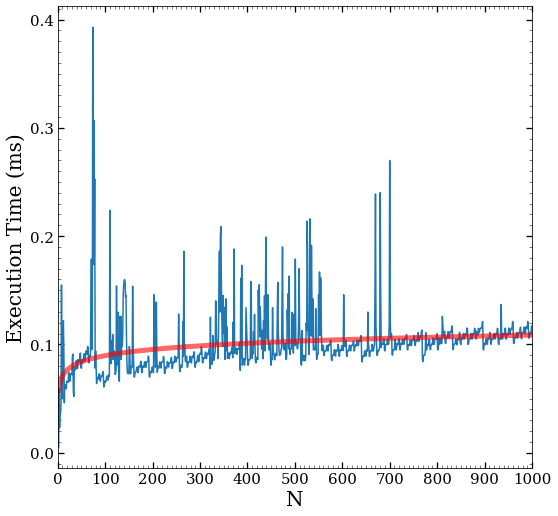

In [ ]:
fig, ax = plt.subplots(1, 1,  figsize=(8.5,8.5))

xmajor = np.arange(0,1100,100)
xminor = np.arange(0,1100,10)

ymajor = np.arange(-1,10,0.1)
yminor = np.arange(-1,10,0.01)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)

ax.set_yticks(ymajor)
ax.set_yticks(yminor,minor=True)


plt.plot(N,T)
f_t=np.poly1d(np.polyfit(np.log(N),T,1))
plt.plot(N,f_t(np.log(N)),linewidth=5,c='red',alpha=0.6)

ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)
ax.set_xlim(0,1000)


ax.set_ylabel('Execution Time (ms)',fontsize=20)
ax.set_xlabel('N',fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

### Part k)

In [ ]:
print("N=10000000 will take",f_t(np.log(10e7)),"ms")

N=10000000 will take 0.33953820327735673 ms
